# Aligned SOM
Authors: Gabriel Haubenburger (11840531), David Seka (11902064)

Code can be found under: https://github.com/P3akShadow/sos-group-repo/tree/master/exercise3/PySOMVis-main

The four code cells below contain existing code. Our code starts afterwards where indicated.

In [37]:
import numpy as np
import pandas as pdcoding
import gzip

In [38]:
#SOMToolbox Parser
from SOMToolBox_Parse import SOMToolBox_Parse
idata = SOMToolBox_Parse("datasets/iris/iris.vec").read_weight_file()
weights = SOMToolBox_Parse("datasets/iris/iris.wgt.gz").read_weight_file()

In [39]:
#HitHistogram
def HitHist(_m, _n, _weights, _idata):
    hist = np.zeros(_m * _n)
    for vector in _idata: 
        position =np.argmin(np.sqrt(np.sum(np.power(_weights - vector, 2), axis=1)))
        hist[position] += 1

    return hist.reshape(_m, _n)

#U-Matrix - implementation
def UMatrix(_m, _n, _weights, _dim):
    U = _weights.reshape(_m, _n, _dim)
    U = np.insert(U, np.arange(1, _n), values=0, axis=1)
    U = np.insert(U, np.arange(1, _m), values=0, axis=0)
    #calculate interpolation
    for i in range(U.shape[0]): 
        if i%2==0:
            for j in range(1,U.shape[1],2):
                U[i,j][0] = np.linalg.norm(U[i,j-1] - U[i,j+1], axis=-1)
        else:
            for j in range(U.shape[1]):
                if j%2==0: 
                    U[i,j][0] = np.linalg.norm(U[i-1,j] - U[i+1,j], axis=-1)
                else:      
                    U[i,j][0] = (np.linalg.norm(U[i-1,j-1] - U[i+1,j+1], axis=-1) + np.linalg.norm(U[i+1,j-1] - U[i-1,j+1], axis=-1))/(2*np.sqrt(2))

    U = np.sum(U, axis=2) #move from Vector to Scalar

    for i in range(0, U.shape[0], 2): #count new values
        for j in range(0, U.shape[1], 2):
            region = []
            if j>0: region.append(U[i][j-1]) #check left border
            if i>0: region.append(U[i-1][j]) #check bottom
            if j<U.shape[1]-1: region.append(U[i][j+1]) #check right border
            if i<U.shape[0]-1: region.append(U[i+1][j]) #check upper border

            U[i,j] = np.median(region)

    return U

#SDH - implementation
def SDH(_m, _n, _weights, _idata, factor, approach):
    import heapq

    sdh_m = np.zeros( _m * _n)

    cs=0
    for i in range(factor): cs += factor-i

    for vector in _idata:
        dist = np.sqrt(np.sum(np.power(_weights - vector, 2), axis=1))
        c = heapq.nsmallest(factor, range(len(dist)), key=dist.__getitem__)
        if (approach==0): # normalized
            for j in range(factor):  sdh_m[c[j]] += (factor-j)/cs 
        if (approach==1):# based on distance
            for j in range(factor): sdh_m[c[j]] += 1.0/dist[c[j]] 
        if (approach==2): 
            dmin, dmax = min(dist[c]), max(dist[c])
            for j in range(factor): sdh_m[c[j]] += 1.0 - (dist[c[j]]-dmin)/(dmax-dmin)

    return sdh_m.reshape(_m, _n)


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
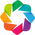

:Layout
   .Image.HitHist               :Image   [x,y]   (z)
   .Image.U_hyphen_minus_Matrix :Image   [x,y]   (z)
   .Image.SDH                   :Image   [x,y]   (z)

In [40]:
import panel as pn
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

hithist = hv.Image(HitHist(weights['ydim'], weights['ydim'], weights['arr'], idata['arr'])).opts(xaxis=None, yaxis=None) 
um = hv.Image(UMatrix(weights['ydim'], weights['ydim'], weights['arr'], 4)).opts(xaxis=None, yaxis=None) 
sdh = hv.Image(SDH(weights['ydim'], weights['ydim'], weights['arr'], idata['arr'], 25, 0)).opts(xaxis=None, yaxis=None)   

hv.Layout([hithist.relabel('HitHist').opts(cmap='kr'), 
           um.relabel('U-Matrix').opts(cmap='jet'), sdh.relabel('SDH').opts(cmap='viridis')])

## Our code starts here

First we modify MiniSom to serve as the individual layers for the Aligned SOM.

In [41]:
import minisom

class AlignedSomLayer(minisom.MiniSom):
    """
    This class implements one layer of an aligned som.
    The key difference to the usual MiniSom is that it won't train on its own,
    but its training is directed by a parent (AlignedSom) using the update - scalded function.
    """
    def __init__(self, n, i, featuresA, x, y, input_len, sigma=1.0, learning_rate=0.5,
                 decay_function=minisom.asymptotic_decay,
                 neighborhood_function='gaussian', topology='rectangular',
                 activation_distance='euclidean', random_seed=42):
        """
        n: number of layers
        i: index of the layer
        featuresA: indices of the features that are in the A dataset
        all the other arguments get passed to the mini som init
        """
        super().__init__(x, y, input_len, sigma, learning_rate, decay_function, neighborhood_function, topology, activation_distance, random_seed)
        self.n = n
        self.i = i
        self.featuresA = featuresA
        
        self.underyling_activation_function = self._activation_distance
        self._activation_distance = self.activation_scale_wrapper




        
    def activation_scale_wrapper(self, x, w):
        """
        Wrapper around the activation function of the underlying som.
        Scales a vector x and the weights w by the factor given by i and w,
        then uses the same activation function as the underlying som would use.
        """
        n = self.n
        i = self.i
        scaleA = (n-i-1)/(n-1)
        scaleB = i/(n-1)

        factor = []
        for j in range(self._input_len):
            if j in self.featuresA:
                factor.append(scaleA)
            else:
                factor.append(scaleB)
        
        xcopy = x.copy()
        wcopy = w.copy()

        xcopy *= np.array(factor)
        wcopy *= np.array(factor)

        return self.underyling_activation_function(xcopy, wcopy)


    def update_scaled(self, x, win, t, max_iteration, scaling_factor):
        """
        Updates the weights of the neurons. Scaled by the scaling Factor.
        In practice, this factor can be something like 1 / how far the layer is from the "pivot" layer
        x : np.array
            Current pattern to learn.
        win : tuple
            Position of the winning neuron for x (array or tuple).
        t : int
            rate of decay for sigma and learning rate
        max_iteration : int
            If use_epochs is True:
                Number of epochs the SOM will be trained for
            If use_epochs is False:
                Maximum number of iterations (one iteration per sample).
        scaling_factor: float
            factor the update is scaled by
        """
        eta = self._decay_function(self._learning_rate, t, max_iteration)
        # sigma and learning rate decrease with the same rule
        sig = self._decay_function(self._sigma, t, max_iteration)
        # improves the performances
        g = self.neighborhood(win, sig)*eta*scaling_factor
        # w_new = eta * neighborhood_function * (x-w)
        self._weights += np.einsum('ij, ijk->ijk', g, x-self._weights)

### Some basic tests

In [42]:
# TODO: tests for AlignedSomLayer

Then we create the actual Aligend SOM class combining multiple layers.

In [43]:

class AlignedSom:
    def __init__(self, x, y, input_len, n, featuresA, base_scaling_factor=1.0, sigma=1.0, learning_rate=0.5,
                 decay_function=minisom.asymptotic_decay,
                 neighborhood_function='gaussian', topology='rectangular',
                 activation_distance='euclidean', random_seed=42):
        """
        initializes the Aligned Som class.
        n guides how many maps are generated
        featuresA sets which features are in the A set (The rest is in B). This should be a list of indices < input_len

        All the other params get handed over to the "children soms"
        """
        self.n = n
        self.featuresA = featuresA
        self.x = x
        self.y = y
        self._random_seed = random_seed

        self._learning_rate = learning_rate
        self._sigma = sigma
        self._input_len = input_len

        self.topology = topology

        self._decay_function = decay_function
        
        self._random_generator = np.random.RandomState(random_seed)

        self._layers = [AlignedSomLayer(n, i, featuresA, x, y, input_len, sigma=sigma, learning_rate=learning_rate, 
                                        decay_function=decay_function, 
                                        neighborhood_function=neighborhood_function, topology=topology, 
                                        activation_distance=activation_distance, random_seed=random_seed
                                        ) for i in range(n)]
        
        self.base_scaling_factor = base_scaling_factor
        self._weights = [self._layers[i]._weights for i in range(n)]


    def train(self, data, num_iteration,
              random_order=False, verbose=False, use_epochs=False):
        """
        Trains the SOM.

        Parameters
        ----------
        data : np.array or list
            Data matrix.

        num_iteration : int
            If use_epochs is False, the weights will be
            updated num_iteration times. Otherwise they will be updated
            len(data)*num_iteration times.

        random_order : bool (default=False)
            If True, samples are picked in random order.
            Otherwise the samples are picked sequentially.

        verbose : bool (default=False)
            If True the status of the training will be
            printed each time the weights are updated.

        use_epochs : bool (default=False)
            If True the SOM will be trained for num_iteration epochs.
            In one epoch the weights are updated len(data) times and
            the learning rate is constat throughout a single epoch.
        """
        
    
        # self._check_iteration_number(num_iteration)
        # self._check_input_len(data)

        random_generator = None
        if random_order:
            random_generator = self._random_generator
        iterations = minisom._build_iteration_indexes(len(data), num_iteration,
                                              verbose, random_generator,
                                              use_epochs)
        if use_epochs:
            def get_decay_rate(iteration_index, data_len):
                return int(iteration_index / data_len)
        else:
            def get_decay_rate(iteration_index, data_len):
                return int(iteration_index)

        for t, iteration in enumerate(iterations):
            #picks a random layer
            chosen_layer_index = self._random_generator.randint(low=0, high=self.n)
            decay_rate = get_decay_rate(t, len(data))
            
            cur_training_sample = data[iteration]
            #calculates winner (a pair of indices)
            winner = self._layers[chosen_layer_index].winner(cur_training_sample)



            for update_layer_index in range(self.n):
                #calculates the distance to the current layer
                diff = chosen_layer_index - update_layer_index
                if diff < 0:
                    diff = -diff

                scaling_factor = self.base_scaling_factor/(1+diff)
                self._layers[update_layer_index].update_scaled(cur_training_sample, winner,
                        decay_rate, num_iteration, scaling_factor)

        if verbose:
            print('\n quantization error:', self.quantization_error(data))


### Some basic tests

In [44]:
#TODO: tests for AlignedSOM
alignedSom = AlignedSom(2, 2, 10, 11, [0, 1, 2])

data = [[1]*10,[2]*10]
alignedSom.train(data, 10)

In [45]:

class AlignedSomVis():
    def __init__(self, weights, input_data, chosen_visulization_index=0):
        """Initializes an Aligned SOM Visulization object.

        Parameters
        ----------
        weights : list
            a list of arrays containing the weights of the SOM layers.

        input_data: np.array
            the array containing the data vectors

        chosen_visulization_index : int
            the index for the default visulization shown by _mainview.
            Possible values: 0 for Hit Histogram, 1 for U-matrix or 2 for SDH.
            Default value is 0.
        """
        self._idata = input_data
        self._num_layers = len(weights)
        
        xdim = weights[0].shape[0]
        ydim = weights[0].shape[1]
        self._weights = [np.reshape(weights[i], (xdim*ydim, -1)) for i in range(self._num_layers)]
        
        vector_dim = len(self._idata[0])
        
        self._images_HitHist = [hv.Image(HitHist(xdim, ydim, self._weights[i], self._idata)).opts(xaxis=None, yaxis=None) for i in range(self._num_layers)]
        self._images_UMatrix = [hv.Image(UMatrix(xdim, ydim, self._weights[i], vector_dim)).opts(xaxis=None, yaxis=None) for i in range(self._num_layers)]
        self._images_SDH = [hv.Image(SDH(xdim, ydim, self._weights[i], self._idata, 25, 0)).opts(xaxis=None, yaxis=None) for i in range(self._num_layers)]
        
        self._maps_SDH = [i for i in range(self._num_layers)]
        sdh_paramd = [lambda factor, approach: hv.Image(SDH(xdim, ydim, self._weights[i], self._idata, factor, approach)).opts(xaxis=None, yaxis=None) for i in range(self._num_layers)]

        self._maps_SDH[0] =  hv.HoloMap({(factor, approach): sdh_paramd[0](factor, approach) for factor in [i+1 for i in range(100)] for approach in [0, 1, 2]},  kdims=['factor', 'approach']) #might need to disable this for larger SOMs if it takes too long
        for i in range(1, self._num_layers):
            self._maps_SDH[i] = hv.DynamicMap(sdh_paramd[i], kdims=['factor', 'approach'])
        ## NOTE: could not get the code below to run, so used the holomap above as a base
        # for dmap in self._maps_SDH:                                                   
        #     dmap.redim.values(factor=[i+1 for i in range(100)], approach=[0, 1, 2])

        self._visualizations = [self._images_HitHist, self._images_UMatrix, self._maps_SDH]
        self._default_color_map = ['kr', 'jet', 'viridis']
        self._titles = ['Hit Histogram', 'U-matrix', 'Smoothed Data Histograms']

        implemented_vis_number = len(self._visualizations)

        self._available_visulizations = [hv.Layout([self._visualizations[j][i].relabel(f'Layer {i}').opts(cmap=self._default_color_map[j]) for i in range(self._num_layers)]).opts(title=self._titles[j]) for j in range(implemented_vis_number)]
        self._mainview = self._available_visulizations[chosen_visulization_index]

### Some basic tests for AlignedSomVis

In [46]:

test_layers = 3
vis = AlignedSomVis(weights=[np.ones((10, 20, 4)) for i in range(test_layers)], input_data=np.ones((20, 4)))
# test if weights have the correct shape
all_in_correct_shape = True
correct_shape = np.ones((200, 4))
for i in range(test_layers):
    all_in_correct_shape = all_in_correct_shape and (vis._weights[i].shape == correct_shape.shape)
print(all_in_correct_shape)

# test if each implemented visualization has a color map and title and vice versa
matching_vis_numbers =  len(vis._visualizations) == len(vis._default_color_map) and len(vis._visualizations) == len(vis._titles)
print(matching_vis_numbers)

C:\Users\temp\AppData\Local\Temp\ipykernel_19268\3663673236.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  for j in range(factor): sdh_m[c[j]] += 1.0/dist[c[j]]
C:\Users\temp\AppData\Local\Temp\ipykernel_19268\3663673236.py:59: RuntimeWarning: invalid value encountered in scalar divide
  for j in range(factor): sdh_m[c[j]] += 1.0 - (dist[c[j]]-dmin)/(dmax-dmin)
C:\Users\temp\AppData\Local\Temp\ipykernel_19268\3663673236.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  for j in range(factor): sdh_m[c[j]] += 1.0/dist[c[j]]
C:\Users\temp\AppData\Local\Temp\ipykernel_19268\3663673236.py:59: RuntimeWarning: invalid value encountered in scalar divide
  for j in range(factor): sdh_m[c[j]] += 1.0 - (dist[c[j]]-dmin)/(dmax-dmin)
C:\Users\temp\AppData\Local\Temp\ipykernel_19268\3663673236.py:56: RuntimeWarning: divide by zero encountered in scalar divide
  for j in range(factor): sdh_m[c[j]] += 1.0/dist[c[j]]
C:\Users\temp\AppData\Local\Temp\ipykernel_19

True
True


C) Evaluation Report
1) Perform and document (!) the testing of the components you coded by defining and
evaluating suitable tests to evaluate the correctness and robustness of the coded modules.




3) Train a 10x10 (small) and a 100x60 (large) SOM. Make sure that the SOMs are properly
trained, i.e. that the structures to be expected in the SOM become clearly visible by identifying
suitable parameters for the initial neighborhood radius and initial learning rate.

Below, we train a 10x10 (small) and a 100x60 (large) SOM on the Chainlink Data Set and the 10-Clusters
Data Set. 

We chose the values for learning rate and sigma as in https://www.ifs.tuwien.ac.at/dm/somtoolbox/datasets/chainlink/chainlink.prop for Chainlink and https://www.ifs.tuwien.ac.at/dm/somtoolbox/datasets/10clusters/10clusters.prop 10-Clusters. Parameters that were not specified were left as default of the AlignedSom class.

In [47]:
def print_provenance(som, visulization_name, extra_params=None):
    print("Number of layers: %d" % som.n)
    print("Indices of features in set A: " + str(som.featuresA) + ", the rest of the " + som._input_len + " features are in set B")
    print("Based on a %d x %d SOM" % (som.x, som.y))
    print("The SOM was trained with sigma of %f and learning rate of %f" % (som._sigma, som._learning_rate))
    print("The current visulization is called %s" % visulization_name)
    if extra_params:
        print(extra_params)

In [48]:

idata_chainlink = SOMToolBox_Parse("datasets/chainlink/chainlink.vec").read_weight_file()

A_set_chainlink = [1, 2]

num_layers_chainlink_small = 10
num_layers_chainlink_large = 5

small_som_chainlink = AlignedSom(10, 10, 3, num_layers_chainlink_small, A_set_chainlink, sigma=7, learning_rate=0.7, random_seed=42)
small_som_chainlink.train(idata_chainlink['arr'], 10000)
large_som_chainlink = AlignedSom(100, 60, 3, num_layers_chainlink_large, A_set_chainlink, sigma=7, learning_rate=0.7, random_seed=42)
large_som_chainlink.train(idata_chainlink['arr'], 10000)

In [49]:
print_provenance(small_som_chainlink, "Hit Histogram")
vis_small_som_chainlink = AlignedSomVis(weights=small_som_chainlink._weights, input_data=idata_chainlink['arr'])
vis_small_som_chainlink._mainview

Number of layers: 10
Indices of features in set A: [1, 2]
Based on a 10 x 10 SOM
input len = 3
The SOM was trained with sigma of 7.000000 and learning rate of 0.700000
The current visulization is called Hit Histogram


C:\Users\temp\AppData\Local\Temp\ipykernel_19268\3663673236.py:59: RuntimeWarning: invalid value encountered in scalar divide
  for j in range(factor): sdh_m[c[j]] += 1.0 - (dist[c[j]]-dmin)/(dmax-dmin)


:Layout
   .Image.Layer_0 :Image   [x,y]   (z)
   .Image.Layer_1 :Image   [x,y]   (z)
   .Image.Layer_2 :Image   [x,y]   (z)
   .Image.Layer_3 :Image   [x,y]   (z)
   .Image.Layer_4 :Image   [x,y]   (z)
   .Image.Layer_5 :Image   [x,y]   (z)
   .Image.Layer_6 :Image   [x,y]   (z)
   .Image.Layer_7 :Image   [x,y]   (z)
   .Image.Layer_8 :Image   [x,y]   (z)
   .Image.Layer_9 :Image   [x,y]   (z)

In [50]:
print_provenance(small_som_chainlink, "U-matrix")
vis_small_som_chainlink._available_visulizations[1]


Number of layers: 10
Indices of features in set A: [1, 2]
Based on a 10 x 10 SOM
input len = 3
The SOM was trained with sigma of 7.000000 and learning rate of 0.700000
The current visulization is called U-matrix


:Layout
   .Image.Layer_0 :Image   [x,y]   (z)
   .Image.Layer_1 :Image   [x,y]   (z)
   .Image.Layer_2 :Image   [x,y]   (z)
   .Image.Layer_3 :Image   [x,y]   (z)
   .Image.Layer_4 :Image   [x,y]   (z)
   .Image.Layer_5 :Image   [x,y]   (z)
   .Image.Layer_6 :Image   [x,y]   (z)
   .Image.Layer_7 :Image   [x,y]   (z)
   .Image.Layer_8 :Image   [x,y]   (z)
   .Image.Layer_9 :Image   [x,y]   (z)

In [51]:
print_provenance(small_som_chainlink, "SDH", extra_params="smoothing factor = 1, approach = 0 (normalized)")
vis_small_som_chainlink._available_visulizations[2]

Number of layers: 10
Indices of features in set A: [1, 2]
Based on a 10 x 10 SOM
input len = 3
The SOM was trained with sigma of 7.000000 and learning rate of 0.700000
The current visulization is called SDH
smoothing factor = 1, approach = 0 (normalized)


BokehModel(combine_events=True, render_bundle={'docs_json': {'8aa5807a-e2bf-456b-8c18-7cd9c2cf3811': {'version…

In [52]:
print_provenance(large_som_chainlink, "Hit Histogram")
vis_large_som_chainlink = AlignedSomVis(weights=large_som_chainlink._weights, input_data=idata_chainlink['arr'])
vis_large_som_chainlink._mainview

Number of layers: 5
Indices of features in set A: [1, 2]
Based on a 100 x 60 SOM
input len = 3
The SOM was trained with sigma of 7.000000 and learning rate of 0.700000
The current visulization is called Hit Histogram


C:\Users\temp\AppData\Local\Temp\ipykernel_19268\3663673236.py:59: RuntimeWarning: invalid value encountered in scalar divide
  for j in range(factor): sdh_m[c[j]] += 1.0 - (dist[c[j]]-dmin)/(dmax-dmin)


:Layout
   .Image.Layer_0 :Image   [x,y]   (z)
   .Image.Layer_1 :Image   [x,y]   (z)
   .Image.Layer_2 :Image   [x,y]   (z)
   .Image.Layer_3 :Image   [x,y]   (z)
   .Image.Layer_4 :Image   [x,y]   (z)

In [53]:
print_provenance(large_som_chainlink, "U-matrix")
vis_large_som_chainlink._available_visulizations[1]

Number of layers: 5
Indices of features in set A: [1, 2]
Based on a 100 x 60 SOM
input len = 3
The SOM was trained with sigma of 7.000000 and learning rate of 0.700000
The current visulization is called U-matrix


:Layout
   .Image.Layer_0 :Image   [x,y]   (z)
   .Image.Layer_1 :Image   [x,y]   (z)
   .Image.Layer_2 :Image   [x,y]   (z)
   .Image.Layer_3 :Image   [x,y]   (z)
   .Image.Layer_4 :Image   [x,y]   (z)

In [54]:
print_provenance(large_som_chainlink, "SDH", extra_params="smoothing factor = 1, approach = 0 (normalized)")
vis_large_som_chainlink._available_visulizations[2]

Number of layers: 5
Indices of features in set A: [1, 2]
Based on a 100 x 60 SOM
input len = 3
The SOM was trained with sigma of 7.000000 and learning rate of 0.700000
The current visulization is called SDH
smoothing factor = 1, approach = 0 (normalized)


BokehModel(combine_events=True, render_bundle={'docs_json': {'e412b505-eb31-4a31-95c8-3cf2e2318347': {'version…

In [22]:
idata_10clusters = SOMToolBox_Parse("datasets/10clusters/10clusters.vec").read_weight_file()

A_set_10clusters = [0, 2, 4, 6, 8]
num_layers_10clusters = 10

small_som_10clusters = AlignedSom(10, 10, 10, num_layers_10clusters, A_set_10clusters, learning_rate=0.7)
small_som_10clusters.train(idata_10clusters['arr'], 10000)

large_som_10clusters = AlignedSom(100, 60, 10, num_layers_10clusters, A_set_10clusters, learning_rate=0.7)
large_som_10clusters.train(idata_10clusters['arr'], 10000)


In [23]:
print_provenance(small_som_10clusters, "Hit Histogram")
vis_small_som_10clusters = AlignedSomVis(weights=small_som_10clusters._weights, input_data=idata_10clusters['arr'])
vis_small_som_10clusters._mainview

C:\Users\temp\AppData\Local\Temp\ipykernel_19268\3663673236.py:59: RuntimeWarning: invalid value encountered in scalar divide
  for j in range(factor): sdh_m[c[j]] += 1.0 - (dist[c[j]]-dmin)/(dmax-dmin)


:Layout
   .Image.Layer_0 :Image   [x,y]   (z)
   .Image.Layer_1 :Image   [x,y]   (z)
   .Image.Layer_2 :Image   [x,y]   (z)
   .Image.Layer_3 :Image   [x,y]   (z)
   .Image.Layer_4 :Image   [x,y]   (z)
   .Image.Layer_5 :Image   [x,y]   (z)
   .Image.Layer_6 :Image   [x,y]   (z)
   .Image.Layer_7 :Image   [x,y]   (z)
   .Image.Layer_8 :Image   [x,y]   (z)
   .Image.Layer_9 :Image   [x,y]   (z)

In [ ]:
print_provenance(small_som_10clusters, "U-matrix")
vis_small_som_10clusters._available_visulizations[1]

In [ ]:
print_provenance(small_som_10clusters, "SDH", extra_params="smoothing factor = 1, approach = 0 (normalized)")
vis_small_som_10clusters._available_visulizations[2]

In [24]:
print_provenance(large_som_10clusters, "Hit Histogram")
vis_large_som_10clusters = AlignedSomVis(weights=large_som_10clusters._weights, input_data=idata_10clusters['arr'])
vis_large_som_10clusters._mainview

C:\Users\temp\AppData\Local\Temp\ipykernel_19268\3663673236.py:59: RuntimeWarning: invalid value encountered in scalar divide
  for j in range(factor): sdh_m[c[j]] += 1.0 - (dist[c[j]]-dmin)/(dmax-dmin)


KeyboardInterrupt: 

In [ ]:
print_provenance(large_som_10clusters, "U-matrix")
vis_large_som_10clusters._available_visulizations[1]

In [ ]:
print_provenance(large_som_10clusters, "SDH", extra_params="smoothing factor = 1, approach = 0 (normalized)")
vis_large_som_10clusters._available_visulizations[2]

4) Show the visualizations, providing examples with different parameter settings and
comparisons that allow a validation of the correctness of the implementation. Specifically,
test a few extreme values for the parameter settings.

6) Provide (export/print) the notebook as separate PDF report that comprises all information.
Hence, the PDF export of the report needs to contain the fully-computed notebook with the
according visualizations shown as results and the information that can be derived from the
visualizations clearly described and semantically analyzed. Make sure that each visualization
includes the parameter setting applied. Specifically, the PDF export needs to contain:
- the implementation developed, explaining key parts of the code of each cell.
- the way the code was systematically tested for correctness, including the test cases
as part of the notebook.
- the evaluations performed under item 3) above, demonstrating the correctness of the
implementation, and the information gained.
- Where applicable: Comparison of the visualization with the identical visualizations
(reading the same trained SOM files) using the SOM Java Toolbox


In [ ]:
#probably some more code
!which xelatex